# Perceptron Learning Algorithm
This Jupyter Notebook demonstrates the implementation of the Perceptron Learning Algorithm for classifying linearly separable data in 2D. The notebook includes the generation of synthetic data, the implementation of the perceptron learning algorithm, and an analysis of the algorithm's performance with varying levels of data separability.

## Importing Necessary Modules
The following modules are required for data generation, algorithm implementation, and visualization:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## Generating Linearly Separable Data
Data is generated based on the linear equation ax + by + c = 0. Each point is labeled based on whether ax + by + c is greater than 0.

ax + by + c = 0

and labelling them according weather ax + by + c > 0 or not

In [2]:
# Define the function to generate linearly separable data
def generate_linearly_separable_data(num_points, a, b, c):
    # Generate random points
    X = np.random.rand(num_points, 2)   
    # Labels based on the line ax + by + c
    Y = (a * X[:, 0] + b * X[:, 1] + c > 0).astype(int)
    return torch.from_numpy(X) , torch.from_numpy(Y)


## Plotting Function
This function visualizes the linearly separable data along with the decision boundary. The decision boundary is calculated using the formula y = -(a/b) * x - c/b.

In [3]:
# Define the function to plot the data
def plot_data_with_decision_boundary(X, Y, a, b, c):
    # Visualize the data
    plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0', alpha=0.7, marker='x')
    plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1', alpha=0.7, marker='x')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Linearly Separable Data with Decision Boundary')
    
    # Calculate the decision boundary
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = -(a/b) * x_vals - c/b
    
    # Plot the original decision boundary
    plt.plot(x_vals, y_vals, '--', color='green', label='Decision Boundary')
    
    # Customize the grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    
    # Customize the plot range
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.legend()
    plt.show()

## Data Generation and Visualization
Generate the synthetic data and visualize it with the decision boundary.

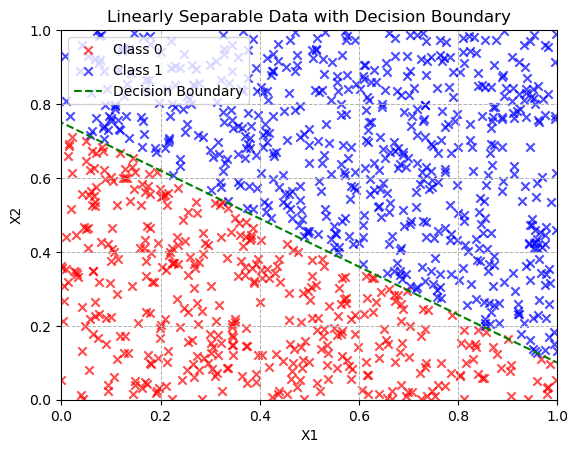

In [4]:
# Generate data
num_points = 1000
a, b, c = 2.6, 4, -3  # Example parameters for the line
X, Y = generate_linearly_separable_data(num_points, a, b, c)

# Plot the data
plot_data_with_decision_boundary(X, Y, a, b, c)

## Perceptron Learning Algorithm Implementation
The perceptron learning algorithm is implemented with a default maximum of 1000 epochs. It returns the learned weights and the number of iterations needed to learn them.

In [135]:
def perceptron_learning_algorithm(X, Y, max_epoch=1000):
    W = torch.rand(3, dtype=torch.float64)
    k = 0 
    for epoch in range(max_epoch):
        misclassified = False
        for i in range(len(X)):
            if Y[i] == 1 and torch.dot(W, X[i]) < 0:
                W = W + X[i]
                misclassified = True
            if Y[i] == 0 and torch.dot(W, X[i]) >= 0:
                W = W - X[i]
                misclassified = True
        k = k + 1
        if not misclassified:
            break
    return W, k

In [136]:
# Create a tensor of ones with the same number of rows as X
ones = torch.ones(X.size(0), 1)

# Concatenate the tensor of ones with X
X_with_ones = torch.cat((ones, X), dim=1)
print(X_with_ones)

tensor([[1.0000, 0.0550, 0.2444],
        [1.0000, 0.7082, 0.8659],
        [1.0000, 0.2971, 0.9561],
        ...,
        [1.0000, 0.3872, 0.0869],
        [1.0000, 0.6954, 0.7007],
        [1.0000, 0.1732, 0.2603]], dtype=torch.float64)


## Running the Perceptron Algorithm
The perceptron algorithm is applied to the linearly separable data.

In [146]:
W, k = perceptron_learning_algorithm(X_with_ones, Y, 1000)

## Weight Visualization
Print the weights learned by the perceptron algorithm.

In [147]:
print(W)

tensor([-12.5022,  10.7866,  16.7089], dtype=torch.float64)


## Plotting the Decision Boundary After Training
Visualize the decision boundary learned by the perceptron on the dataset.

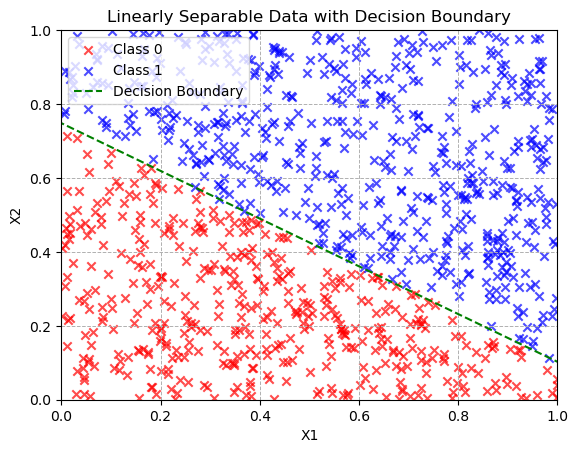

In [148]:
plot_data_with_decision_boundary(X, Y, W[1], W[2], W[0])

## Generating Data with Varying Separability (Gamma)
Data with different levels of separability is generated using PyTorch. The separability is controlled using the gamma parameter. Covariance matrices are set to identity to ensure features vary independently.

In [149]:
def generate_data(num_points_per_class, gamma_values):
    data_list = []
    labels_list = []
    
    for gamma in gamma_values:
        # Means for each class
        mean_class1 = torch.tensor([gamma, gamma])
        mean_class2 = torch.tensor([-gamma, -gamma])
        
        # Covariance matrices for each class (identity matrices in this case)
        cov_matrix_class1 = torch.eye(2)
        cov_matrix_class2 = torch.eye(2)
        
        # Generate random data points for each class
        data_class1 = torch.distributions.MultivariateNormal(mean_class1, cov_matrix_class1).sample((num_points_per_class,))
        data_class2 = torch.distributions.MultivariateNormal(mean_class2, cov_matrix_class2).sample((num_points_per_class,))
        
        # Combine data from both classes
        data = torch.cat((data_class1, data_class2), dim=0)
        labels = torch.cat((torch.zeros(num_points_per_class), torch.ones(num_points_per_class)))
        
        data_list.append(data)
        labels_list.append(labels)
    
    return data_list, labels_list


## Plotting Data for Different Gamma Values
Visualize the data for different levels of separability.

In [160]:
def plot_data_with_gamma(data_list, labels_list, gamma_values):
    # Number of rows and columns for the subplot grid
    num_rows = 2
    num_cols = (len(gamma_values) + 1) // num_rows

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    for i, (data, labels, gamma) in enumerate(zip(data_list, labels_list, gamma_values)):
        ax = axes[i]
        
        # Separate data by class
        data_class1 = data[labels == 0]
        data_class2 = data[labels == 1]
        
        # Plot the data to visualize the separability
        ax.scatter(data_class1[:, 0], data_class1[:, 1], color='red', label='Class 0', alpha=0.5)
        ax.scatter(data_class2[:, 0], data_class2[:, 1], color='blue', label='Class 1', alpha=0.5)
        
        # Customize the plot
        ax.set_title(f'Dataset with γ = {gamma}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend()
        ax.grid(True, linestyle='--', linewidth=0.7)
    
    # Hide any unused subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

## Plotting Data for Different Gamma Values
Visualize the data for different levels of separability.

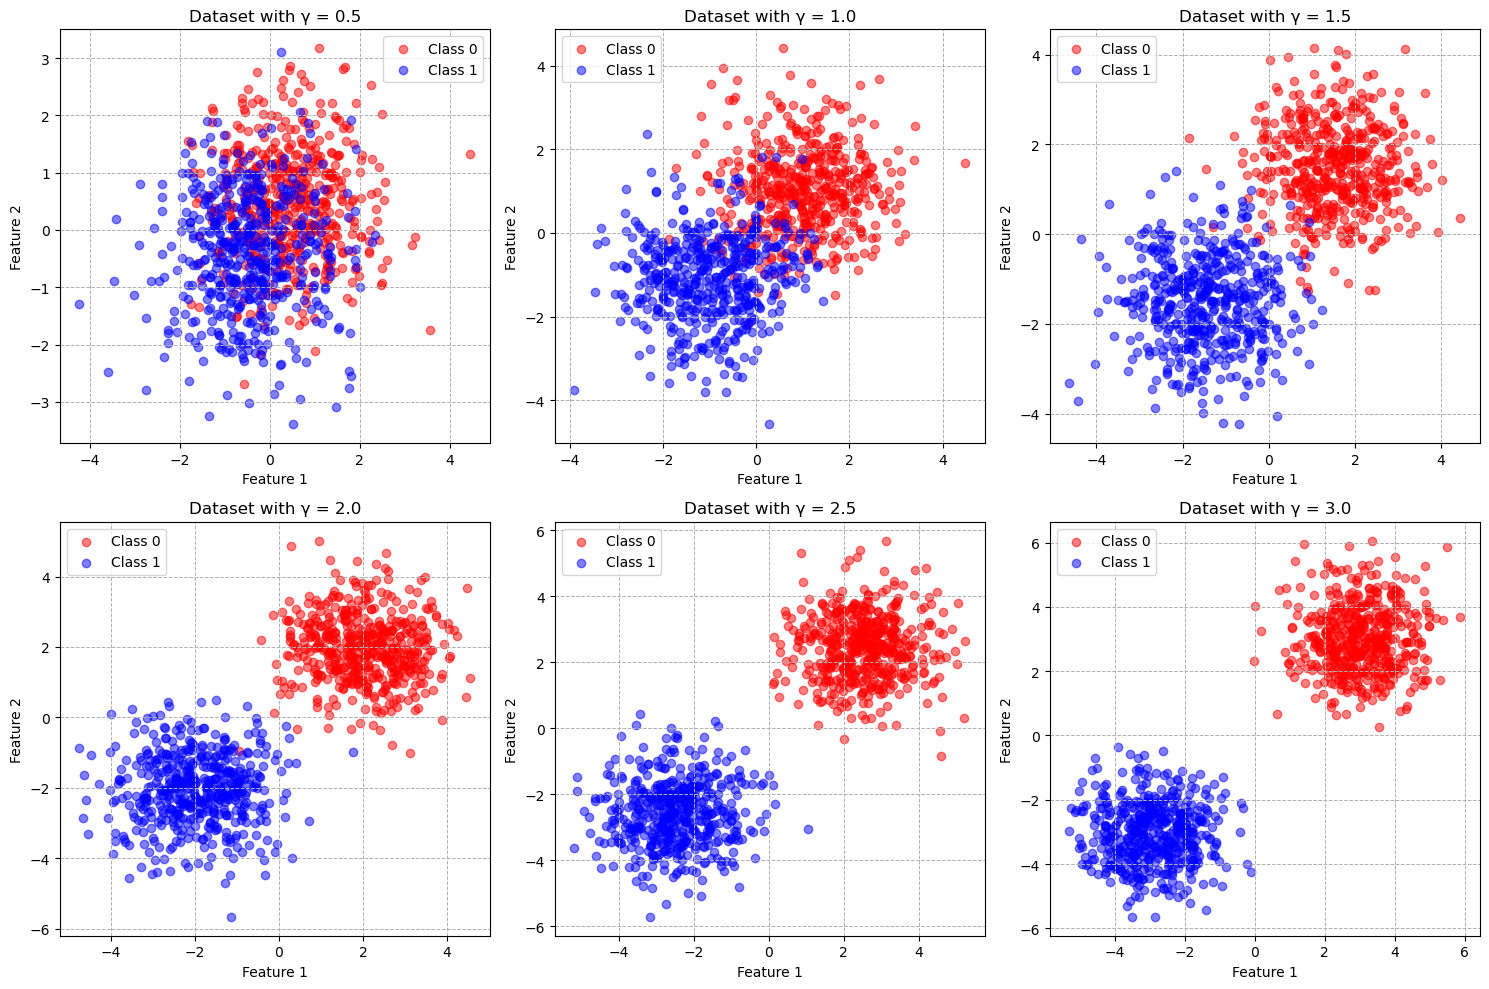

In [161]:
# Number of points per class
num_points_per_class = 500
# Different levels of separability
gamma_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

# Generate data
data_list, labels_list = generate_data(num_points_per_class, gamma_values)

# Plot the data
plot_data_with_gamma(data_list, labels_list, gamma_values)


## Running Experiments for Different Gamma Values
The perceptron learning algorithm is run for different values of gamma. The average number of iterations (k) and the final weight vector (W) are recorded for analysis.

In [155]:
avg_runs_per_gamma = 5

# Prepare lists to store the average results for each gamma
avg_k_per_gamma = []
avg_W_per_gamma = []

for data, labels, gamma in zip(data_list, labels_list, gamma_values):
    k_list_per_gamma = []
    W_list_per_gamma = []
    for run in range(avg_runs_per_gamma):
        # Create a tensor of ones with the same number of rows as data
        ones = torch.ones(data.size(0), 1,  dtype=torch.float64)

        # Concatenate the tensor of ones with data to include the bias term
        X_with_ones = torch.cat((ones, data), dim=1)

        # Run the perceptron learning algorithm
        W, k = perceptron_learning_algorithm(X_with_ones, labels)

        # Append the results for this run
        W_list_per_gamma.append(W)
        k_list_per_gamma.append(k)

    # Calculate the mean of W and k for avg_runs_per_gamma
    avg_W = torch.mean(torch.stack(W_list_per_gamma), dim=0)
    avg_k = sum(k_list_per_gamma) / len(k_list_per_gamma)

    # Store the average values of W and k for this level of separability (gamma)
    avg_W_per_gamma.append(avg_W)
    avg_k_per_gamma.append(avg_k)

# At this point, avg_W_per_gamma contains the average final weight vector for each gamma
# and avg_k_per_gamma contains the average number of iterations required for convergence for each gamma

# You can print or plot the results to analyze the effect of gamma on the convergence of the perceptron
print("Average number of iterations (k) per gamma:", avg_k_per_gamma)


Average number of iterations (k) per gamma: [1000.0, 1000.0, 1000.0, 1000.0, 2.8]


## Visualizing the Decision Boundary for Each Dataset
Plot the decision boundary for each dataset corresponding to different gamma values.

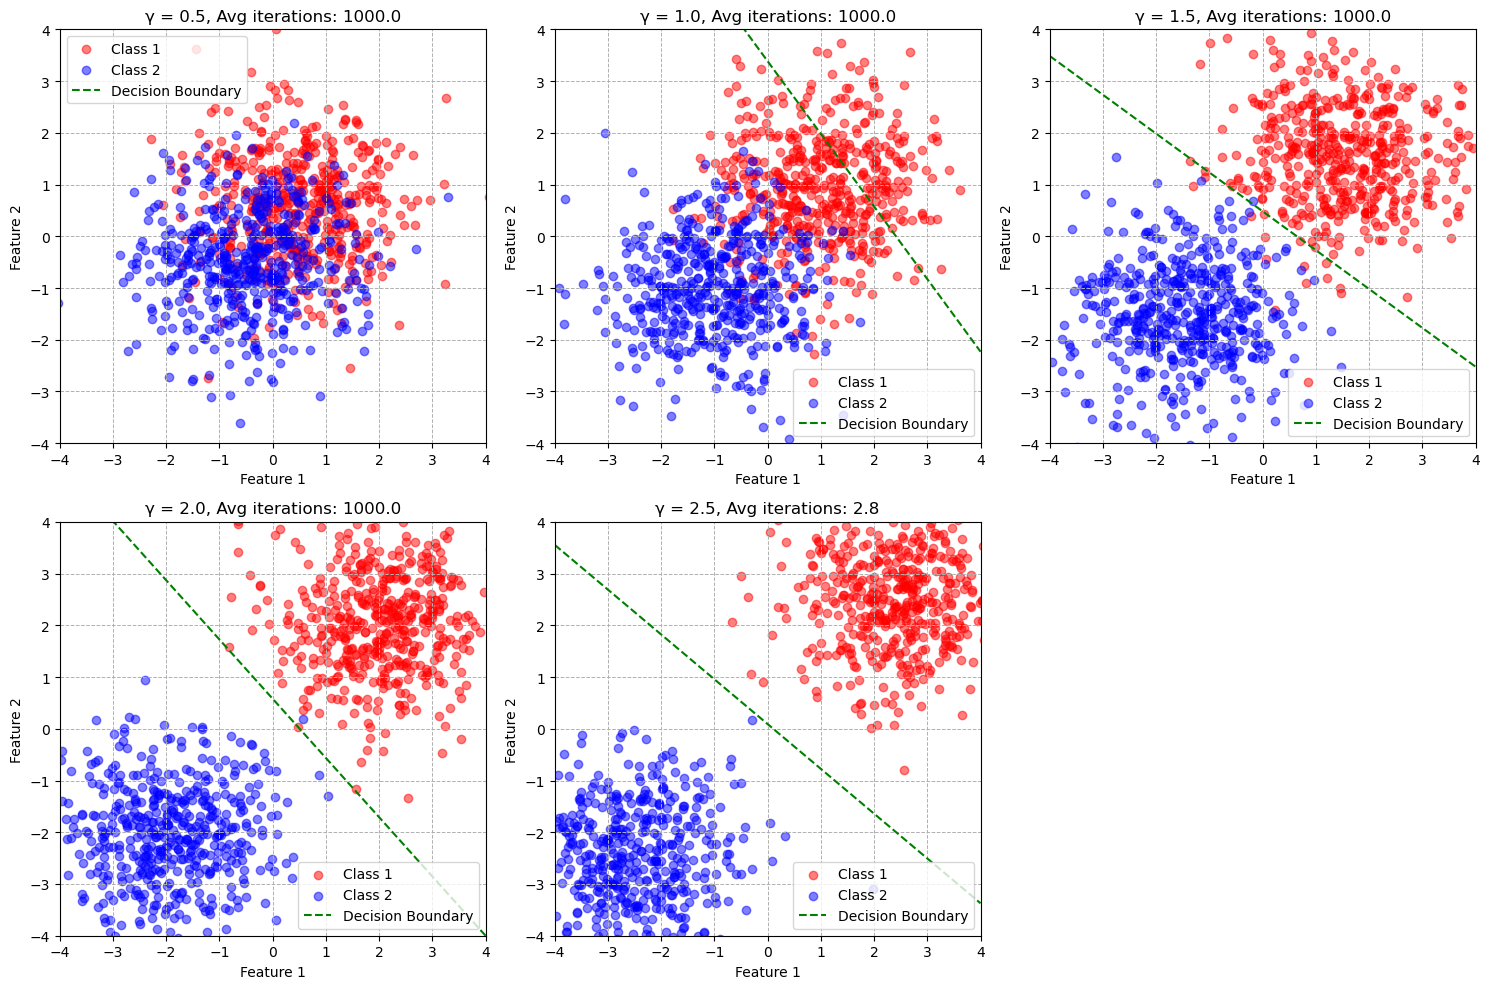

In [159]:
# Number of rows and columns for the subplot grid
num_rows = 2
num_cols = (len(gamma_values) + 1) // num_rows

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, (W, k, gamma, data, labels) in enumerate(zip(avg_W_per_gamma, avg_k_per_gamma, gamma_values, data_list, labels_list)):
    ax = axes[i]
    
    # Separate data by class for plotting
    data_class1 = data[labels == 0]
    data_class2 = data[labels == 1]
    
    # Plot the data points
    ax.scatter(data_class1[:, 0], data_class1[:, 1], color='red', label='Class 1', alpha=0.5)
    ax.scatter(data_class2[:, 0], data_class2[:, 1], color='blue', label='Class 2', alpha=0.5)
    
    # Calculate the decision boundary based on the average weight vector W
    x_vals = np.linspace(-4, 4, 100)
    y_vals = -(W[1]/W[2]) * x_vals - (W[0]/W[2])  # Adjust the decision boundary calculation as needed
    
    # Plot the decision boundary
    ax.plot(x_vals, y_vals, '--', color='green', label=f'Decision Boundary')
    
    # Customize the plot
    ax.set_title(f'γ = {gamma}, Avg iterations: {k}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.grid(True, linestyle='--', linewidth=0.7)
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Plotting No. of Iterations (k) vs. Gamma
A simple plot visualizes the relationship between the average number of iterations (k) required for the perceptron to converge and the level of separability (gamma).

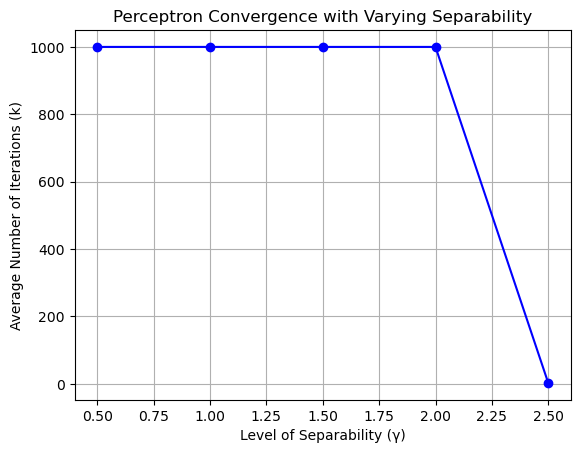

In [157]:
# Assuming avg_k_per_gamma contains the average number of iterations for convergence for each gamma
# and gamma_values contains the corresponding gamma values

plt.plot(gamma_values, avg_k_per_gamma, '-o', color='blue')
plt.xlabel('Level of Separability (γ)')
plt.ylabel('Average Number of Iterations (k)')
plt.title('Perceptron Convergence with Varying Separability')
plt.grid(True)
plt.show()


## Discussion of Results
The plot clearly shows that as the level of separability (gamma) increases, the average number of iterations required for the perceptron to converge decreases. This observation aligns with the theoretical understanding that a higher separability makes it easier for the perceptron learning algorithm to find a solution, hence requiring fewer iterations.